# Matplotlib
- https://matplotlib.org/
- Permite a criação de visualizações estáticas mais simples até os gráficos mais complexos e elaborados
- Como diz a própria documentação, ele torna o que é fácil, fácil e as coisas difíceis, possíveis de serem feitas!
- Ela é bem completa e também é útil para analytics
- Não possui tanta customização quanto outras bibliotecas e **pode deixar a desejas no apelo estético em alguns casos**

### Pyplot
- O Pyplot é o módulo do matplotlib que possui os gráficos básicos normalmente usados nessa biblioteca
- Vamos usar bastante o pyplot e, por isso, vamos importar diretamente esse módulo

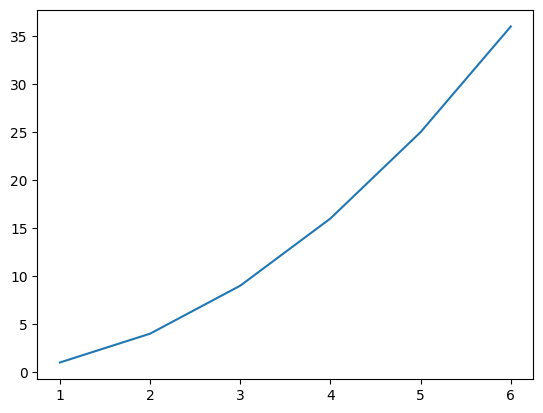

In [45]:
# Criando nosso primeiro plot
# Disponívem em: https://matplotlib.org/stable/users/getting_started/
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [1,4,9,16,25,36]

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [46]:
# Importando o pyplot
import matplotlib.pyplot as plt

# Importando as outras bibliotecas
import numpy as np
import pandas as pd
import datetime as dt

### Vamos usar a base do Instagram que vimos no primeiro projeto e já aplicar todas as transformações

In [47]:
# Importar a base em excel
base = pd.read_excel("08. Analisando o engajamento no Instagram.xlsx")
# Apagando a coluna "Visualizações"
base = base.drop("Visualizações",axis=1)
# Agora vamos atribuir o valor N para essa coluna
base.loc[base.Carrossel.isnull(),"Carrossel"] = "N"

In [48]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


## Criando um plot no matplotlib
- https://matplotlib.org/stable/plot_types/basic/plot.html

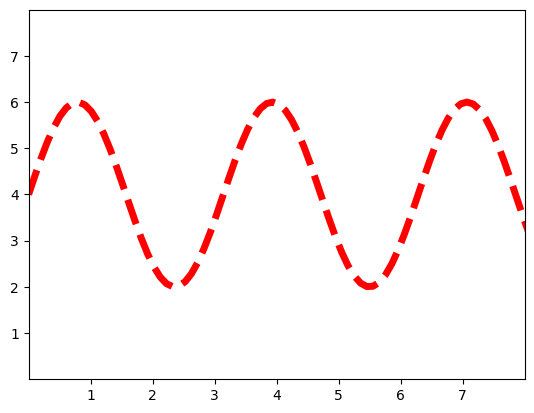

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig, ax = plt.subplots()

ax.plot(x, y,'r--', linewidth=5.0)

ax.set(xlim=(0,8),xticks=np.arange(1, 8),
      ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

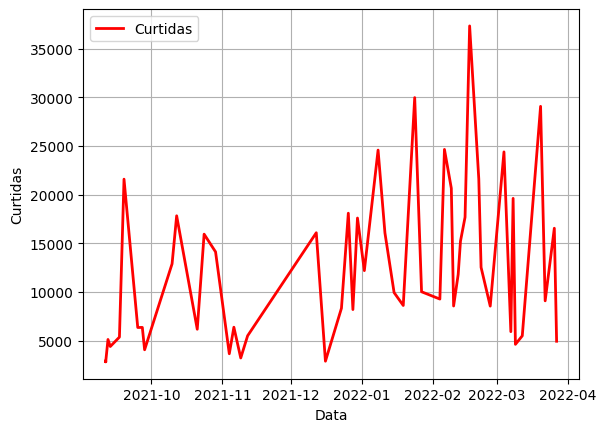

In [50]:
# make data
x = base.Data
y = base.Curtidas

# plot
fig, ax = plt.subplots()

ax.plot(x, y, label = 'Curtidas', color='r',linewidth=2.0)
ax.legend()

ax.set_xlabel('Data')
ax.set_ylabel('Curtidas')
ax.grid(True)

plt.show()

### Será que existe uma tendência de queda nas curtidas?
- Vamos fazer uma análise mensal
    - Para isso precisamos criar a coluna mês/ano

In [51]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [52]:
import datetime as dt

In [53]:
# Criando a coluna do mês
base["mes"] = base.Data.dt.year*100 + base.Data.dt.month

# Verificando a coluna criada
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437,202109


In [54]:
# Relembrando o groupby
media_mensal = base.groupby("mes")["Curtidas"].mean()
media_mensal

mes
202109     6181.500000
202110    13390.400000
202111     4682.000000
202112    11863.833333
202201    15913.285714
202202    17081.363636
202203    13299.555556
Name: Curtidas, dtype: float64

In [55]:
type(media_mensal)

pandas.core.series.Series

In [56]:
# O groupby vai ter o index
media_mensal.index

Index([202109, 202110, 202111, 202112, 202201, 202202, 202203], dtype='int32', name='mes')

In [57]:
# E os valores
media_mensal.values

array([ 6181.5       , 13390.4       ,  4682.        , 11863.83333333,
       15913.28571429, 17081.36363636, 13299.55555556])

#### E podemos usar exatamente essas informações para criar o nosso gráfico

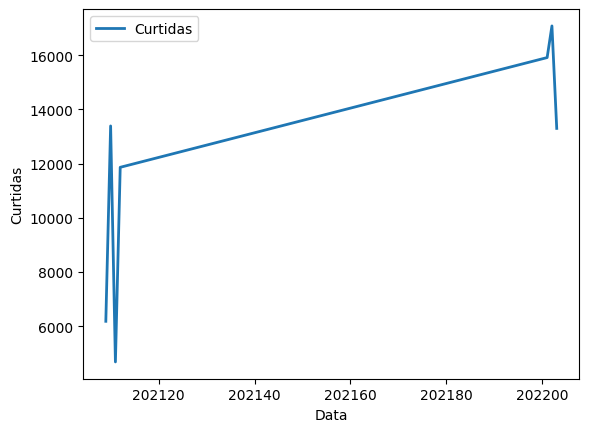

In [58]:
# make data
x = media_mensal.index
y = media_mensal.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, label='Curtidas')
ax.legend()
ax.set_xlabel('Data')
ax.set_ylabel('Curtidas')

plt.show()

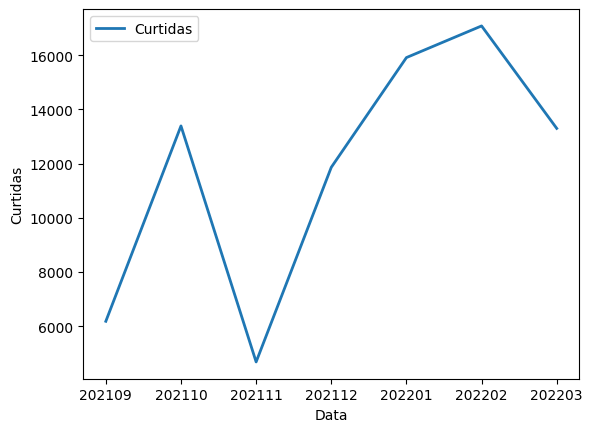

In [59]:
# make data
x = media_mensal.index.astype(str)
y = media_mensal.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, label='Curtidas')
ax.legend()

ax.set_xlabel('Data')
ax.set_ylabel('Curtidas')

plt.show()

## Adicionando novos dados nesse gráfico

In [60]:
# Fazendo para o mínimo e máximo de curtidas
minimo = base.groupby("mes")["Curtidas"].min()
maximo = base.groupby("mes")["Curtidas"].max()

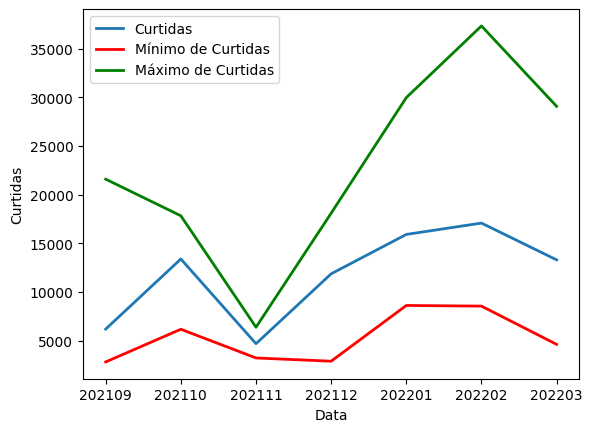

In [61]:
# make data
x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

# plot
fig, ax = plt.subplots()

ax.set_xlabel('Data')
ax.set_ylabel('Curtidas')

ax.plot(x, y, linewidth=2.0, label='Curtidas')
ax.plot(x1, y1, linewidth=2.0, color="r",label='Mínimo de Curtidas')
ax.plot(x2, y2, linewidth=2.0, color='g',label='Máximo de Curtidas')
ax.legend()

plt.show()

#### Entendendo os dados dos últimos 2 meses

In [62]:
base[(base.mes >= 202202)].sort_values(["mes","Curtidas"],ascending=False)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203
43,Foto,2022-03-04,24399,266,NaN,S,S,N,24665,202203
45,Reels,2022-03-08,19621,275,Trends,S,S,N,19896,202203
50,Foto,2022-03-26,16551,186,NaN,S,N,N,16737,202203
49,Foto,2022-03-22,9087,106,NaN,S,S,N,9193,202203
44,IGTV,2022-03-07,5918,116,Dicas de como usar/Novos Produtos,S,N,N,6034,202203
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,202203
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999,202203
46,Foto,2022-03-09,4613,50,Influenciadores,S,N,N,4663,202203
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853,202202


**Aconteceu um post patrocinado que aumentou muito as vendas de fevereiro**
<br>
**Foi a única vez que tivemos post patrocinado? Vamos buscar isso nas tags**
- Podemos usar o contains para procurar a palavra patrocinado nas tags
    - Porém o contains não aceita se tiver valores NaN, então precisamos tratar isso antes

In [63]:
# Tentando usar o contains sem tratar os valores NaN
# base[base.Tags.str.contains("Promoções")] # vai dar erro

In [64]:
# O `.fillna()` vai substituir os valores NaN pelo novo valor que passarmos
base.fillna("").tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,N,5566,202203
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203
49,Foto,2022-03-22,9087,106,,S,S,N,9193,202203
50,Foto,2022-03-26,16551,186,,S,N,N,16737,202203
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,N,4999,202203


In [65]:
# Então podemos usar o vazio apenas para visualizar todas as tags que possuem marcação de patrocinado
base[base.fillna("").Tags.str.contains("Promoções")]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
13,Foto,2021-10-24,15940,612,Promoções,S,N,N,16552,202110
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853,202202
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563,202203


In [66]:
# Apagando as linhas dos posts patrocinados

base = base.drop([13,39,48],axis=0)

In [67]:
# Todas as linhas de Promoções foram apagadas

base[base.fillna("").Tags.str.contains("Promoções")]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes


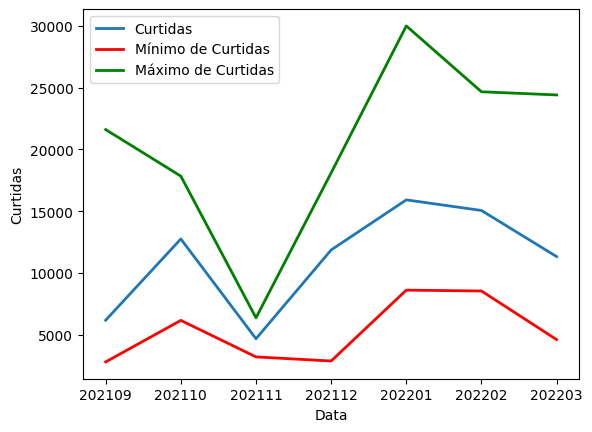

In [68]:
# Refazendo os cálculos pra base sem os posts patrocinados e refazendo o plot
media_mensal = base.groupby("mes")["Curtidas"].mean()
minimo = base.groupby("mes")["Curtidas"].min()
maximo = base.groupby("mes")["Curtidas"].max()

# make data
x = media_mensal.index.astype(str)
y = media_mensal.values
x1 = minimo.index.astype(str)
y1 = minimo.values
x2 = maximo.index.astype(str)
y2 = maximo.values

# plot
fig, ax = plt.subplots()

ax.set_xlabel('Data')
ax.set_ylabel('Curtidas')

ax.plot(x, y, linewidth=2.0, label='Curtidas')
ax.plot(x1, y1, linewidth=2.0, color="r",label='Mínimo de Curtidas')
ax.plot(x2, y2, linewidth=2.0, color='g',label='Máximo de Curtidas')
ax.legend()


plt.show()

### Como podemos visualizar as tags que mais impactaram o negócio?

In [69]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437,202109


In [70]:
# Analisar a coluna Tags, porque as outras colunas possuen dados repetidos

baseTags = base
baseTags.Tags = baseTags.Tags.str.split("/")
baseTags = baseTags.explode('Tags')
baseTags.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874,202109
1,Foto,2021-09-11,2930,28,Loja,N,N,N,2958,202109
1,Foto,2021-09-11,2930,28,Produtos,N,N,N,2958,202109
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816,202109
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164,202109


In [71]:
baseTags.groupby("Tags")["Curtidas"].mean()

Tags
Datas comemorativas    17975.000000
Dicas de como usar      6833.400000
Influenciadores        15197.285714
Loja                    2865.000000
Novos Produtos         10304.888889
Produtos                6269.823529
Trends                 20024.000000
Name: Curtidas, dtype: float64

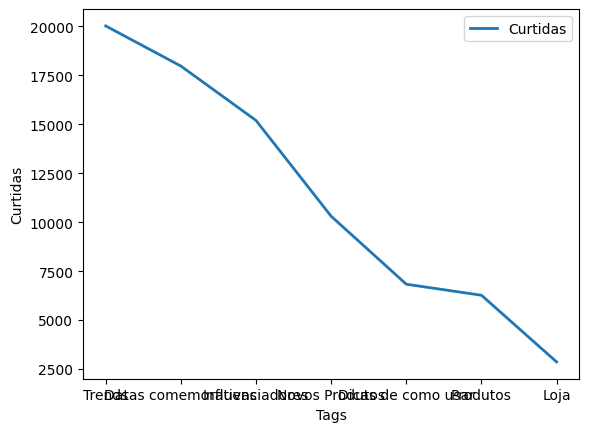

In [72]:
# Fazendo o plot para tags
media = baseTags.groupby("Tags")["Curtidas"].mean().sort_values(ascending=False)

# make data
x = media.index
y = media.values

# plot
fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, label='Curtidas')
ax.legend()
ax.set_xlabel('Tags')
ax.set_ylabel('Curtidas')

plt.show()

## Criando um bar plot no matplotlib
- https://matplotlib.org/stable/plot_types/basic/bar.html#sphx-glr-plot-types-basic-bar-py

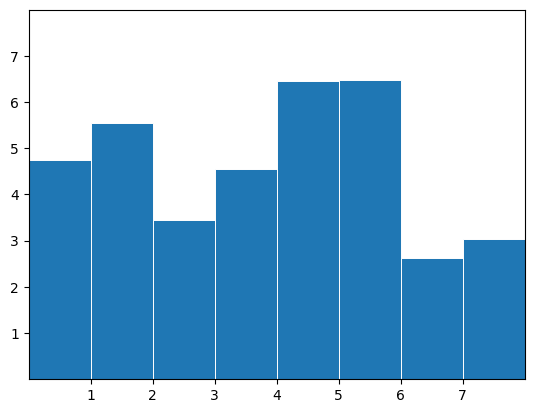

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# make data:
np.random.seed(3)
x = 0.5 + np.arange(8)
y = np.random.uniform(2, 7, len(x))

# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

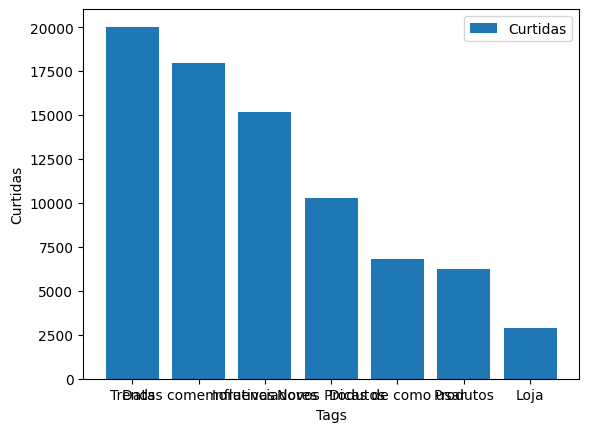

In [74]:
# Fazendo o plot para tags
media = baseTags.groupby("Tags")["Curtidas"].mean().sort_values(ascending=False)

# make data
x = media.index
y = media.values

# plot
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0, label='Curtidas')
ax.legend()
ax.set_xlabel('Tags')
ax.set_ylabel('Curtidas')

plt.show()

## Ajustando o eixo X
- https://matplotlib.org/stable/tutorials/introductory/usage.html

![](https://matplotlib.org/stable/_images/anatomy.png)

#### Para ajustar o eixo x, vamos usar o tick_params
- https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.axes.Axes.tick_params.html

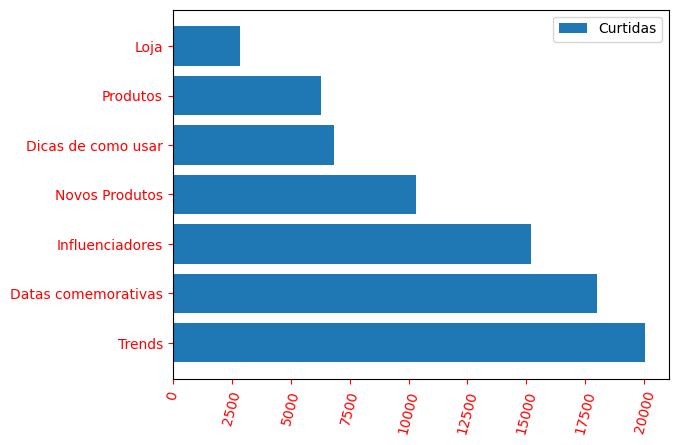

In [75]:
# plot
fig, ax = plt.subplots()

ax.barh(x, y, label="Curtidas")

# Rotacionando as legendas
ax.tick_params('x',labelrotation=75, colors='r')
ax.tick_params('y',labelrotation=0, colors='r')

# Adicionando a legenda
ax.legend()

plt.show()

## Inserindo as quantidades de curtida nos gráficos
- Para isso, vamos usar o annotate
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Com ele você consegue colocar qualquer texto no seu gráfico
    - Basta usar: `plt.annotate("TEXTO",(x,y))`
- Precisamos passar de argumentos:
    - texto que vai ser escrito
    - Posição (x,y) onde o texto vai estar

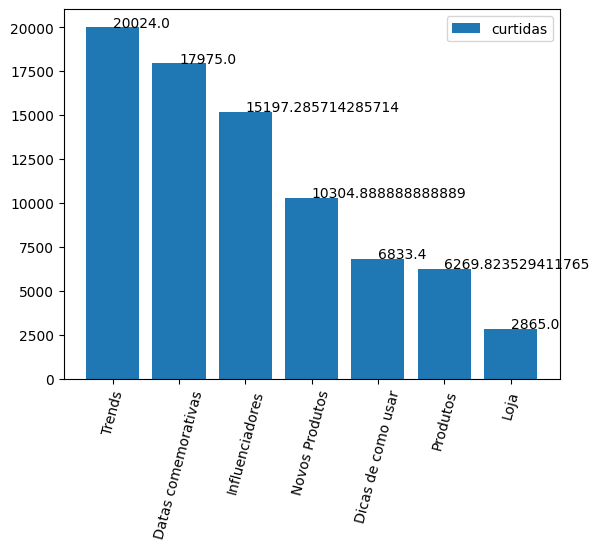

In [76]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="curtidas")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando somente o primeiro valor no gráfico
for i in range(0,7):
    plt.annotate(y[i],(i,y[i]))

plt.show()

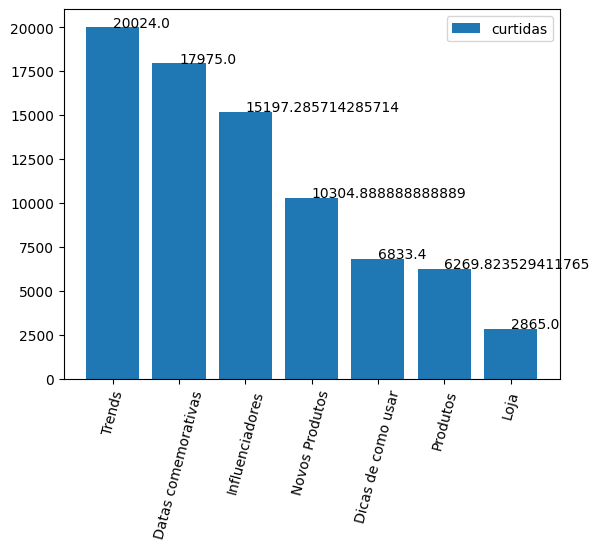

In [77]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="curtidas")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando os valores nos gráficos
## Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,7):
    plt.annotate(y[i],(i,y[i]))

plt.show()

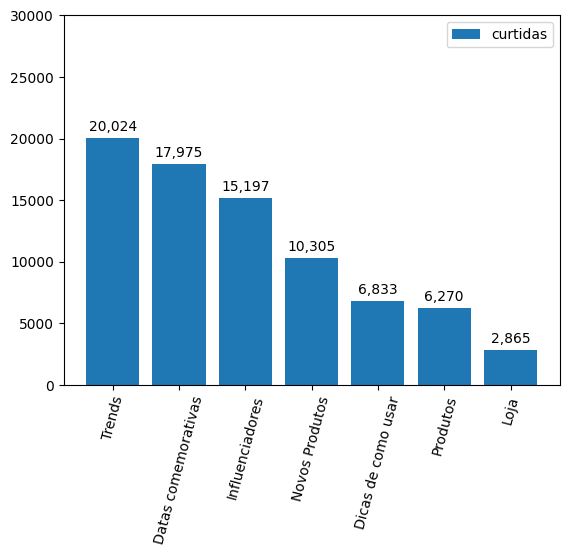

In [78]:
#### Melhorando a formatação do annotate
# plot
fig, ax = plt.subplots()

ax.bar(x, y, label="curtidas")
ax.tick_params('x',labelrotation=75)
ax.legend()

# Colocando os valores nos gráficos
## Precisamos fazer um loop para ir colocando os valores em cada uma das barras
for i in np.arange(0,7):
    plt.annotate('{:,.0f}'.format(y[i]), # formatando o número
                 (i,y[i]), # colocando a posição do elemento 
                 # outros parâmetros
                 ha="center", # alinhamento horizontal
                 xytext=(0,5), # deslocamento x,y do texto
                 textcoords="offset points" # referencial que vamos fazer o deslocamento
                )

ax.set(ylim=(0, 30000))

plt.show()

## Criando um scatter plot usando apenas a documentação
- https://matplotlib.org/
    - Plot Types
    - scatter(x,y)

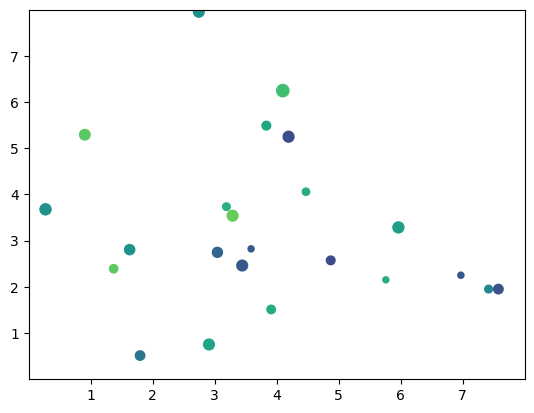

In [79]:
# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [80]:
# Na parte dos dados, a gente pode usar a relação de curtidas x comentários
x = base.Curtidas
y = base.Comentários

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


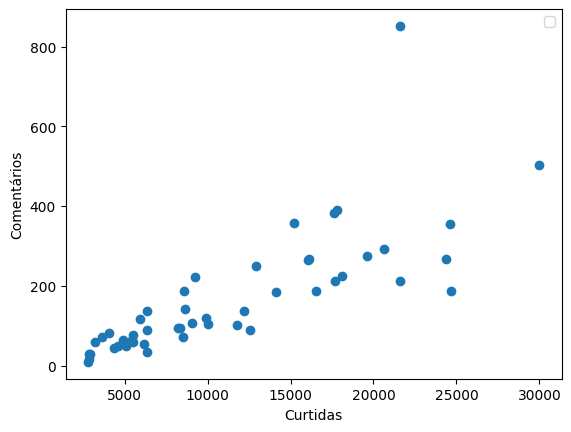

In [81]:
# Depois já podemos ir direto pro plot, usando apenas o básico
fig, ax = plt.subplots()

ax.scatter(x, y)

ax.legend()
ax.set_xlabel('Curtidas')
ax.set_ylabel('Comentários')


plt.show()

#### Podemos criar uma nova coluna para ser a cor baseado no tipo de publicação

In [82]:
base.Tipo.unique()

array(['Foto', 'Vídeo', 'Reels', 'IGTV'], dtype=object)

In [83]:
def tipo_para_numero(tipo):
    if(tipo == 'Foto'):
        return 1
    elif(tipo == 'Vídeo'):
        return 2
    elif(tipo == 'Reels'):
        return 3
    elif(tipo == 'IGTV'):
        return 4

In [84]:
base['NrTipo'] = base.Tipo.apply(tipo_para_numero)

In [85]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes,mes,NrTipo
0,Foto,2021-09-11,2858,16,[Loja],N,N,N,2874,202109,1
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,N,2958,202109,1
2,Foto,2021-09-11,2807,9,[Loja],N,N,N,2816,202109,1
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,N,5164,202109,2
4,Foto,2021-09-13,4392,45,[Produtos],S,N,N,4437,202109,1


In [86]:
colors = base.NrTipo

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


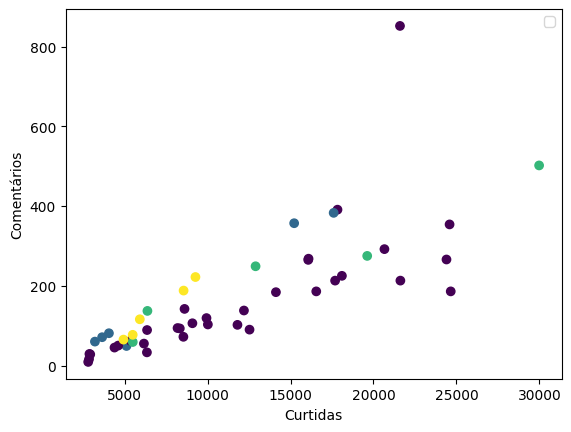

In [87]:
# Depois já podemos ir direto pro plot, usando apenas o básico
fig, ax = plt.subplots()

ax.scatter(x, y, c=colors)

ax.legend()
ax.set_xlabel('Curtidas')
ax.set_ylabel('Comentários')


plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


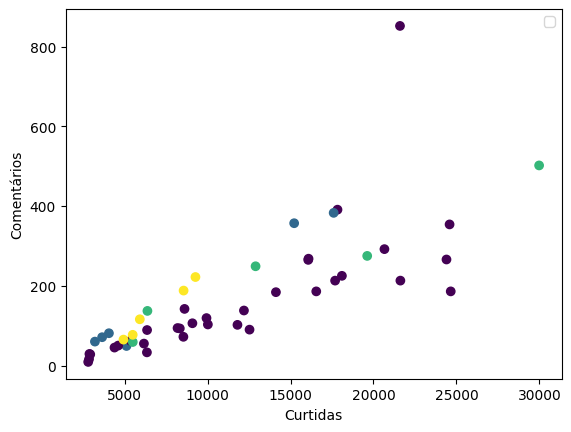

In [88]:
### DICA: Podemos também adicionar a legenda em relação a cada um dos pontos
fig, ax = plt.subplots()

scatter_plot = ax.scatter(x, y, c=colors)

ax.legend(handles=scatter_plot.legend_elements()[0], labels=['Foto','Vídeo','Reels','IGTV'])

ax.legend()
ax.set_xlabel('Curtidas')
ax.set_ylabel('Comentários')
    
plt.show()